In [1]:
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm
from bs4 import BeautifulSoup
from env import api_key
import time
import json
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.reset_option("display.max_rows", "display.max_columns")
import prepare 
import re
from time import sleep
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

In [2]:
def plot_variable_pairs(train, cols, hue=None):
    '''
    This function takes in a df, a list of cols to plot, and default hue=None 
    and displays a pairplot with a red regression line.
    '''
    plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.7}}
    sns.pairplot(train[cols], hue=hue, kind="reg",plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
    plt.show()

    
def plot_pairplot(train, cols, hue=None):
    '''
    Take in train df, list of columns to plot, and hue=None
    and display scatter plots and hists.
    '''
    sns.pairplot(train[cols], corner=True)
    plt.show()
    
    
    
def correlation_exploration(train, x_string, y_string):
    '''
    This function takes in a df, a string for an x-axis variable in the df, 
    and a string for a y-axis variable in the df and displays a scatter plot, the r-
    squared value, and the p-value. It explores the correlation between input the x 
    and y variables.
    '''
    r, p = stats.pearsonr(train[x_string], train[y_string])
    train.plot.scatter(x_string, y_string)
    plt.title(f"{x_string}'s Relationship with {y_string}")
    print(f'The p-value is: {p}. There is {round(p,3)}% chance that we see these results by chance.')
    print(f'r = {round(r, 2)}')
    plt.show()
    
def explore_univariate(df, variable):
    '''
    explore_univariate will take in a dataframe, and one feature or variable. It graphs a box plot and a distribution 
    of the single variable.
    '''
    #set figure size, font for axis ticks, and turns off gridlines.
    plt.figure(figsize=(30,10))
    sns.set(font_scale = 2)
    sns.set_style("whitegrid", {'axes.grid' : False})
    
    # boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=variable, data=df)
    plt.xlabel('')
    plt.title('Box Plot', fontsize=30)
    
    # distribution
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=variable, element='step', kde=True, color='blue')
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Distribution', fontsize=30)
    
    #title
    plt.suptitle(f'{variable}', fontsize = 45)
    plt.tight_layout()
    plt.show()
    
    
def explore_multivariate(train, target, cat_vars, quant_vars):
    '''
    '''
    plot_swarm_grid_with_color(train, target, cat_vars, quant_vars)
    plt.show()
    violin = plot_violin_grid_with_color(train, target, cat_vars, quant_vars)
    plt.show()
    pair = sns.pairplot(data=train, vars=quant_vars, hue=target)
    plt.show()    

def plot_swarm_grid_with_color(train, target, cat_vars, quant_vars):
    cols = len(cat_vars)
    for quant in quant_vars:
        _, ax = plt.subplots(nrows=1, ncols=cols, figsize=(16, 6), sharey=True)
        for i, cat in enumerate(cat_vars):
            sns.swarmplot(x=cat, y=quant, data=train, ax=ax[i], hue=target, palette="Set2")
            ax[i].set_xlabel('')
            ax[i].set_ylabel(quant)
            ax[i].set_title(cat)
        
def plot_violin_grid_with_color(train, target, cat_vars, quant_vars):
    cols = len(cat_vars)
    for quant in quant_vars:
        _, ax = plt.subplots(nrows=1, ncols=cols, figsize=(16, 4), sharey=True)
        for i, cat in enumerate(cat_vars):
            sns.violinplot(x=cat, y=quant, data=train, split=True, 
                           ax=ax[i], hue=target, palette="Set2")
            ax[i].set_xlabel('')
            ax[i].set_ylabel(quant)
            ax[i].set_title(cat) 

def plot_variable_pairs(train, cols, hue=None):
    '''
    This function takes in a df, a list of cols to plot, and default hue=None 
    and displays a pairplot with a red regression line.
    '''
    plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.4}}
    sns.pairplot(train[cols], hue=hue, kind="reg",plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
    sns.set(font_scale = .7)
    plt.show()


# Exploration

- Target = Winning_Team

Questions to research
Univariate Study
- Ward score effects the outcome
- assists effects the outcome 
- damage by magic effects the outcome
- buildings effect the outcome
- xp gained effects the outcome
- number of inhibitors lost effects the outcome
- inhibitor lost team 100, team_jungleMinionsKilled_100, team_killsplayer_100, team_level_100, team_minionsKilled_100.
- repeat above but for 200 team
- dragaon team effects the outcome of the game

Bivariate Study

- winning team and blue team level > 50, also < 50
- same for red team
- team_magicDamageDoneToChampions_100 > the average, also < average
- run same for 200
- winning team and team_physicalDamageDoneToChampions_100 > average, also < average
- run same for 200

Multivariate Study

-  blue team takes dragons and blue team assists effects the outcome of the game
- blue wards and blue towers taken effects the outcome of the game
- blue damage is more important then red damage will efect the outcome
- Red towers lost and total red team damage will effect the outcome of a red team win


In [101]:
df = pd.read_csv('final_15.csv')

df

,Unnamed: 0,airdragon_team100,assistsplayer_1,assistsplayer_10,assistsplayer_2,assistsplayer_3,assistsplayer_4,assistsplayer_5,assistsplayer_6,assistsplayer_7,assistsplayer_8,assistsplayer_9,baron_team100,baron_team200,chemtechdragon_team100,chemtechdragon_team200,currentGold_1,currentGold_10,currentGold_2,currentGold_3,currentGold_4,currentGold_5,currentGold_6,currentGold_7,currentGold_8,currentGold_9,deathsplayer_1,deathsplayer_10,deathsplayer_2,deathsplayer_3,deathsplayer_4,deathsplayer_5,deathsplayer_6,deathsplayer_7,deathsplayer_8,deathsplayer_9,dragon_team100,dragon_team200,earthdragon_team100,earthdragon_team200,firedragon_team100,firedragon_team200,gameDuration,gameEndTimestamp,gameId,gameMode,gameName,gameStartTimestamp,gameType,gameVersion,goldPerSecond_1,goldPerSecond_10,goldPerSecond_2,goldPerSecond_3,goldPerSecond_4,goldPerSecond_5,goldPerSecond_6,goldPerSecond_7,goldPerSecond_8,goldPerSecond_9,hextechdragon_team100,hextechdragon_team200,inhibs_lost_team100,inhibs_lost_team200,jungleMinionsKilled_1,jungleMinionsKilled_10,jungleMinionsKilled_2,jungleMinionsKilled_3,jungleMinionsKilled_4,jungleMinionsKilled_5,jungleMinionsKilled_6,jungleMinionsKilled_7,jungleMinionsKilled_8,jungleMinionsKilled_9,killsplayer_0,killsplayer_1,killsplayer_10,killsplayer_2,killsplayer_3,killsplayer_4,killsplayer_5,killsplayer_6,killsplayer_7,killsplayer_8,killsplayer_9,level_1,level_10,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,magicDamageDoneToChampions_1,magicDamageDoneToChampions_10,magicDamageDoneToChampions_2,magicDamageDoneToChampions_3,magicDamageDoneToChampions_4,magicDamageDoneToChampions_5,magicDamageDoneToChampions_6,magicDamageDoneToChampions_7,magicDamageDoneToChampions_8,magicDamageDoneToChampions_9,matchId,minionsKilled_1,minionsKilled_10,minionsKilled_2,minionsKilled_3,minionsKilled_4,minionsKilled_5,minionsKilled_6,minionsKilled_7,minionsKilled_8,minionsKilled_9,physicalDamageDoneToChampions_1,physicalDamageDoneToChampions_10,physicalDamageDoneToChampions_2,physicalDamageDoneToChampions_3,physicalDamageDoneToChampions_4,physicalDamageDoneToChampions_5,physicalDamageDoneToChampions_6,physicalDamageDoneToChampions_7,physicalDamageDoneToChampions_8,physicalDamageDoneToChampions_9,queueId,riftherald_team100,riftherald_team200,riftherald_team300,timeEnemySpentControlled_1,timeEnemySpentControlled_10,timeEnemySpentControlled_2,timeEnemySpentControlled_3,timeEnemySpentControlled_4,timeEnemySpentControlled_5,timeEnemySpentControlled_6,timeEnemySpentControlled_7,timeEnemySpentControlled_8,timeEnemySpentControlled_9,timestamp,totalDamageDoneToChampions_1,totalDamageDoneToChampions_10,totalDamageDoneToChampions_2,totalDamageDoneToChampions_3,totalDamageDoneToChampions_4,totalDamageDoneToChampions_5,totalDamageDoneToChampions_6,totalDamageDoneToChampions_7,totalDamageDoneToChampions_8,totalDamageDoneToChampions_9,totalGold_1,totalGold_10,totalGold_2,totalGold_3,totalGold_4,totalGold_5,totalGold_6,totalGold_7,totalGold_8,totalGold_9,towers_lost_team100,towers_lost_team200,trueDamageDoneToChampions_1,trueDamageDoneToChampions_10,trueDamageDoneToChampions_2,trueDamageDoneToChampions_3,trueDamageDoneToChampions_4,trueDamageDoneToChampions_5,trueDamageDoneToChampions_6,trueDamageDoneToChampions_7,trueDamageDoneToChampions_8,trueDamageDoneToChampions_9,ward_player_0,ward_player_1,ward_player_10,ward_player_2,ward_player_3,ward_player_4,ward_player_5,ward_player_6,ward_player_7,ward_player_8,ward_player_9,waterdragon_team100,winningTeam,xp_1,xp_10,xp_2,xp_3,xp_4,xp_5,xp_6,xp_7,xp_8,xp_9,waterdragon_team200,airdragon_team200
0,0,0.0,2.0,5.0,0.0,2.0,3.0,10.0,0.0,3.0,2.0,1.0,0.0,1.0,1.0,1.0,720.0,70.0,494.0,383.0,1255.0,721.0,797.0,-69.0,412.0,484.0,2.0,7.0,2.0,3.0,3.0,4.0,5.0,1.0,0.0,7.0,2.0,2.0,0.0,1.0,0.0,0.0,1681,1637427884537,4110434630,CLASSIC,teambuilder-match-4110434630,1637426203210,MATCHED_GAME,11.23.409.111,0.0,30.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,107.0,0.0,4.0,0.0,8.0,87.0,0.0,4.0,0.0,

In [102]:
df = prepare.clean(df)

In [107]:
df.isnull().sum()

Unnamed: 0                     0
airdragon_team100              0
assistsplayer_1                0
assistsplayer_10               0
assistsplayer_2                0
                              ..
RedTeamXp                      0
BlueTeamTotalGoldDifference    0
RedTeamTotalGoldDifference     0
BlueTeamMVPKills               0
RedTeamMVPKills                0
Length: 231, dtype: int64

In [108]:
df1 = df.drop(columns=['gameMode', 'gameType','gameVersion'])

In [110]:
def split(df):
    
    train, test = train_test_split(df, test_size = 0.2, random_state = 123)

    return train, test


In [111]:
df = split(df)

In [112]:
train.shape,test.shape

((2940, 231), (1051, 231))

# Univariate 

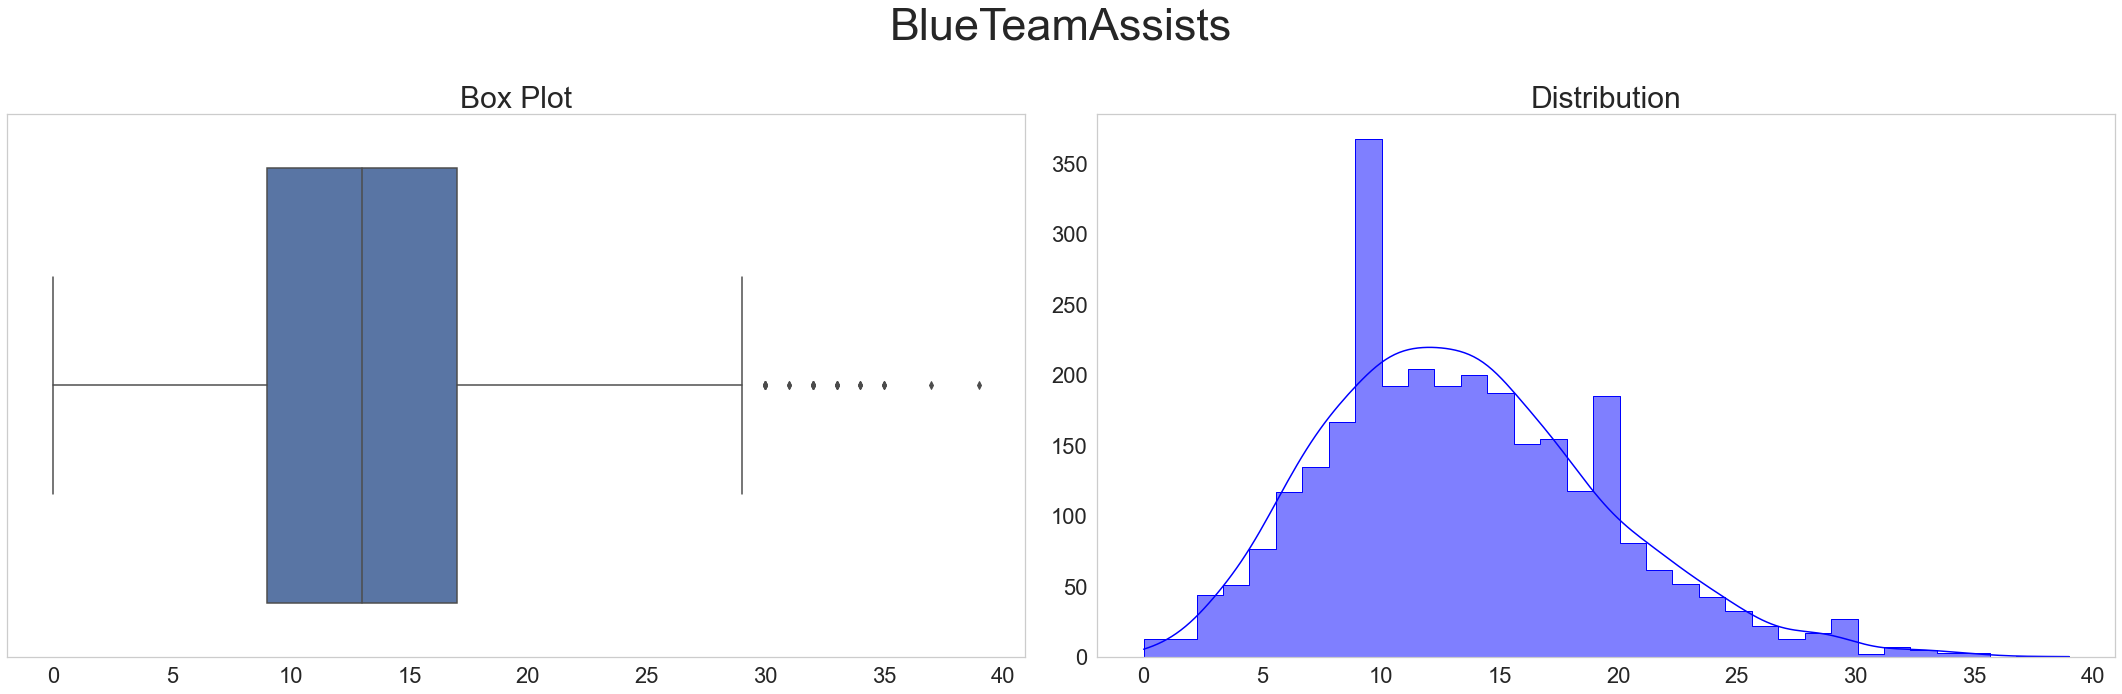

Summary Statistics for BlueTeamAssists
count    2940.000000
mean       13.509524
std         5.937772
min         0.000000
25%         9.000000
50%        13.000000
75%        17.000000
max        39.000000
Name: BlueTeamAssists, dtype: float64


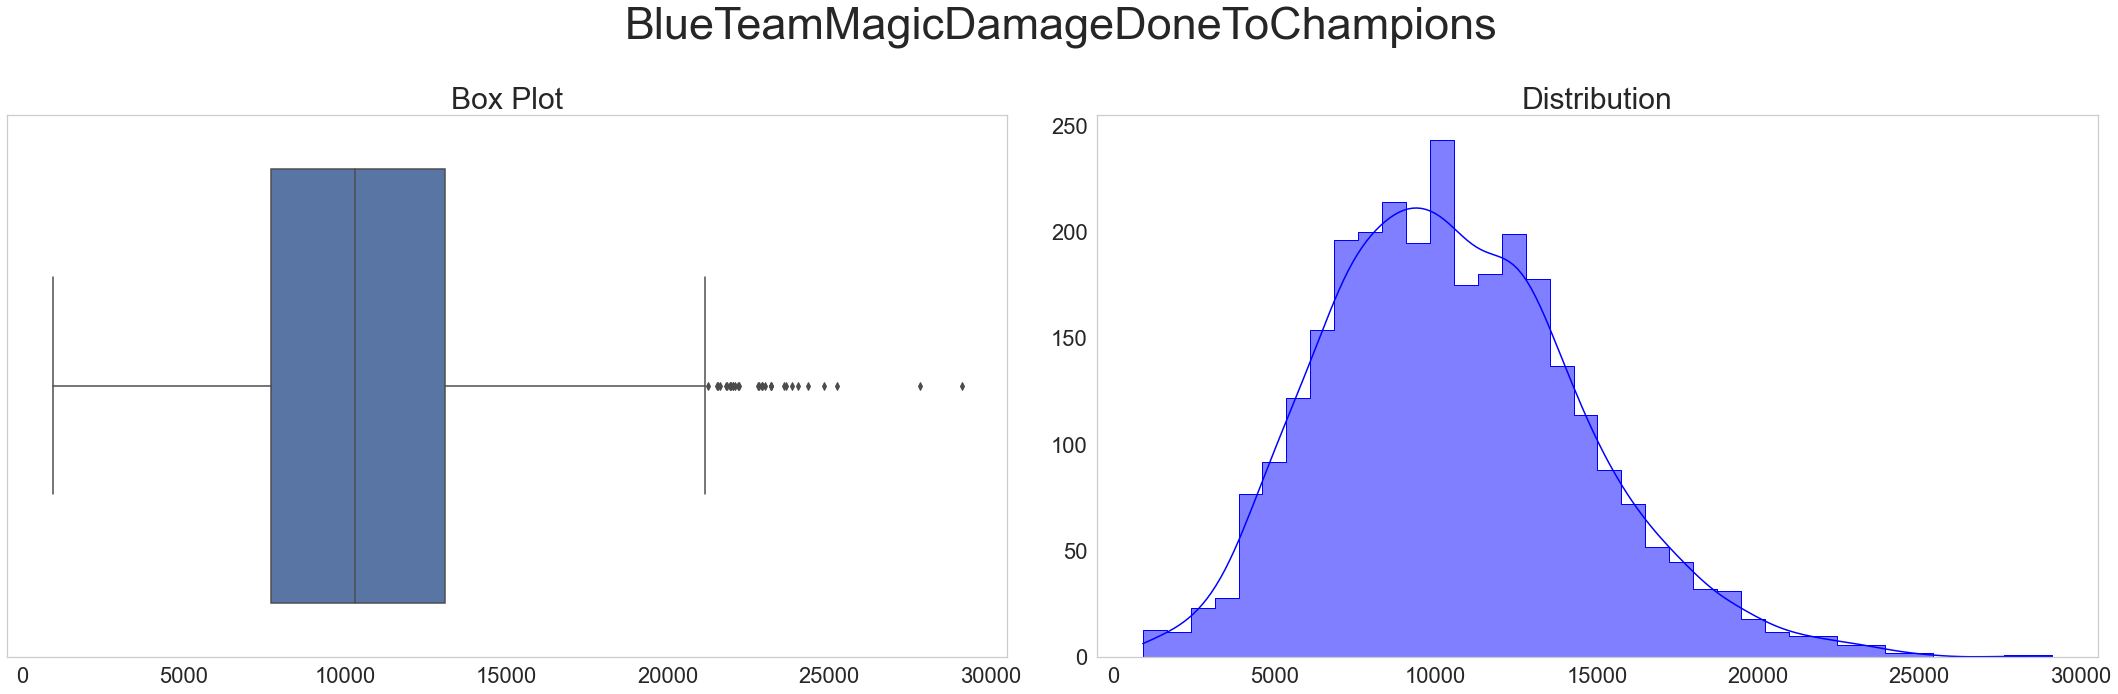

Summary Statistics for BlueTeamMagicDamageDoneToChampions
count     2940.000000
mean     10591.387415
std       4013.499849
min        928.000000
25%       7686.250000
50%      10290.500000
75%      13098.250000
max      29116.000000
Name: BlueTeamMagicDamageDoneToChampions, dtype: float64


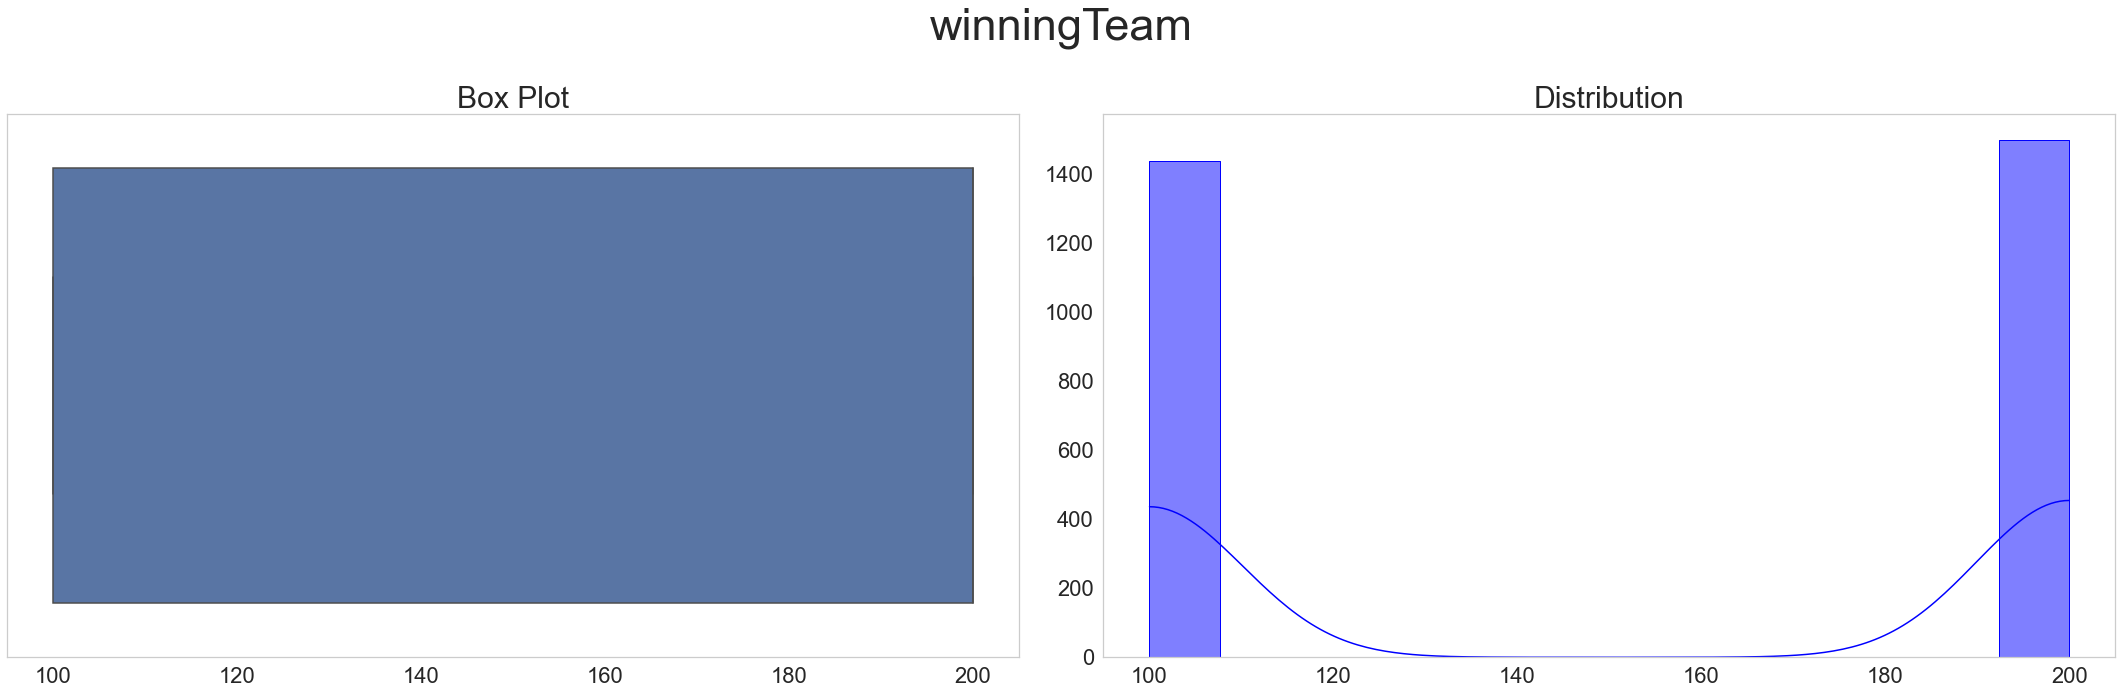

Summary Statistics for winningTeam
count    2940.000000
mean      151.020408
std        49.998090
min       100.000000
25%       100.000000
50%       200.000000
75%       200.000000
max       200.000000
Name: winningTeam, dtype: float64


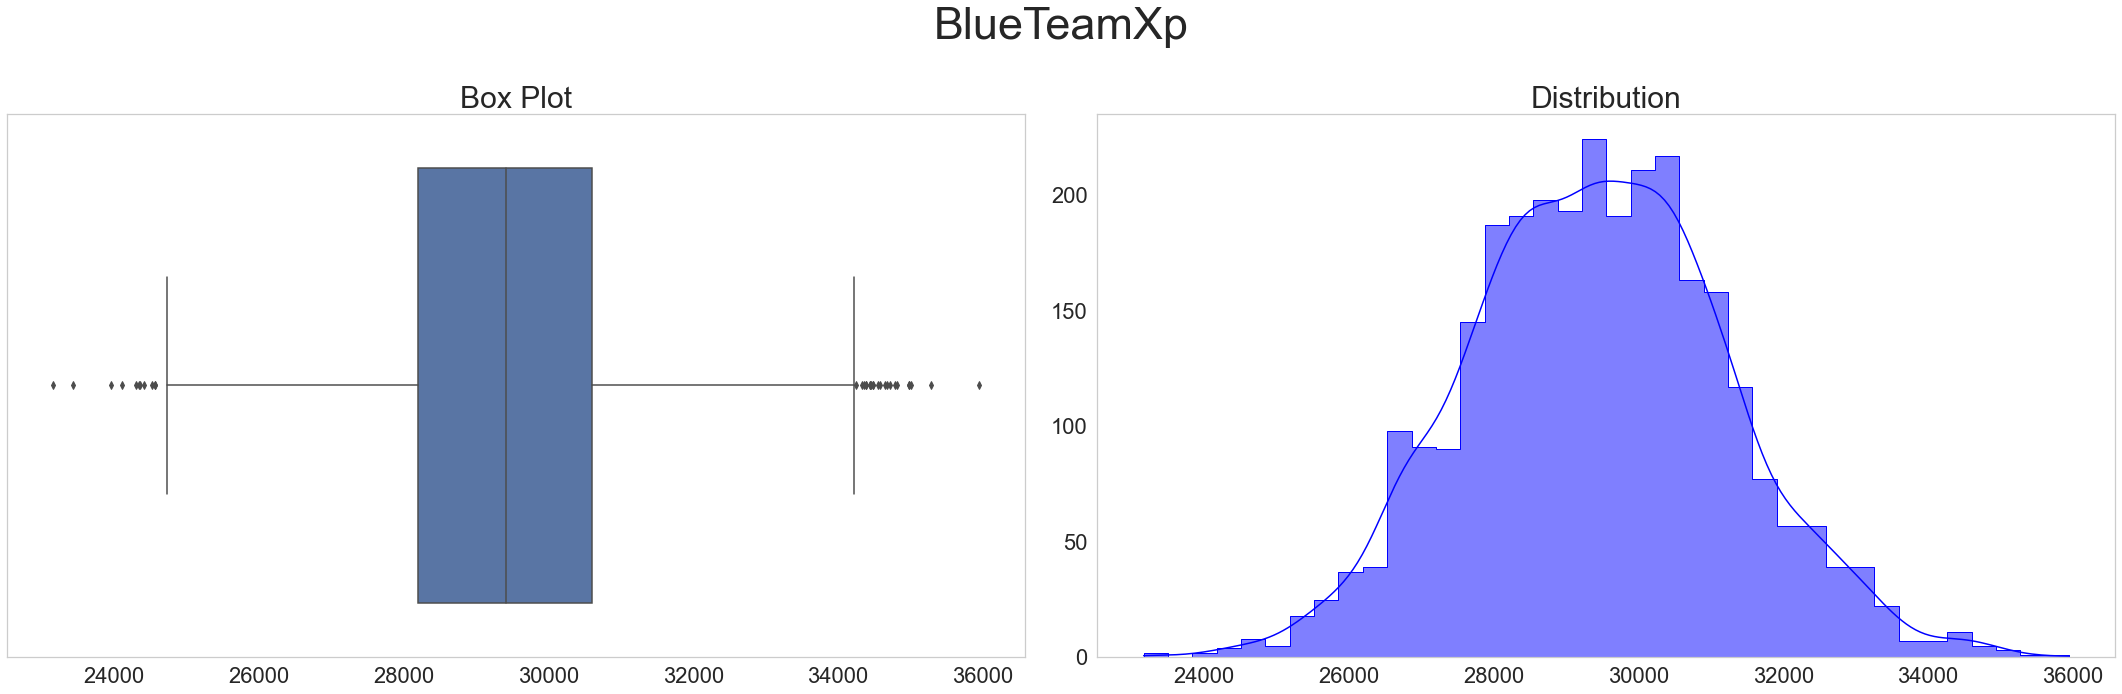

Summary Statistics for BlueTeamXp
count     2940.000000
mean     29433.540476
std       1811.992956
min      23162.000000
25%      28192.000000
50%      29417.000000
75%      30605.000000
max      35947.000000
Name: BlueTeamXp, dtype: float64


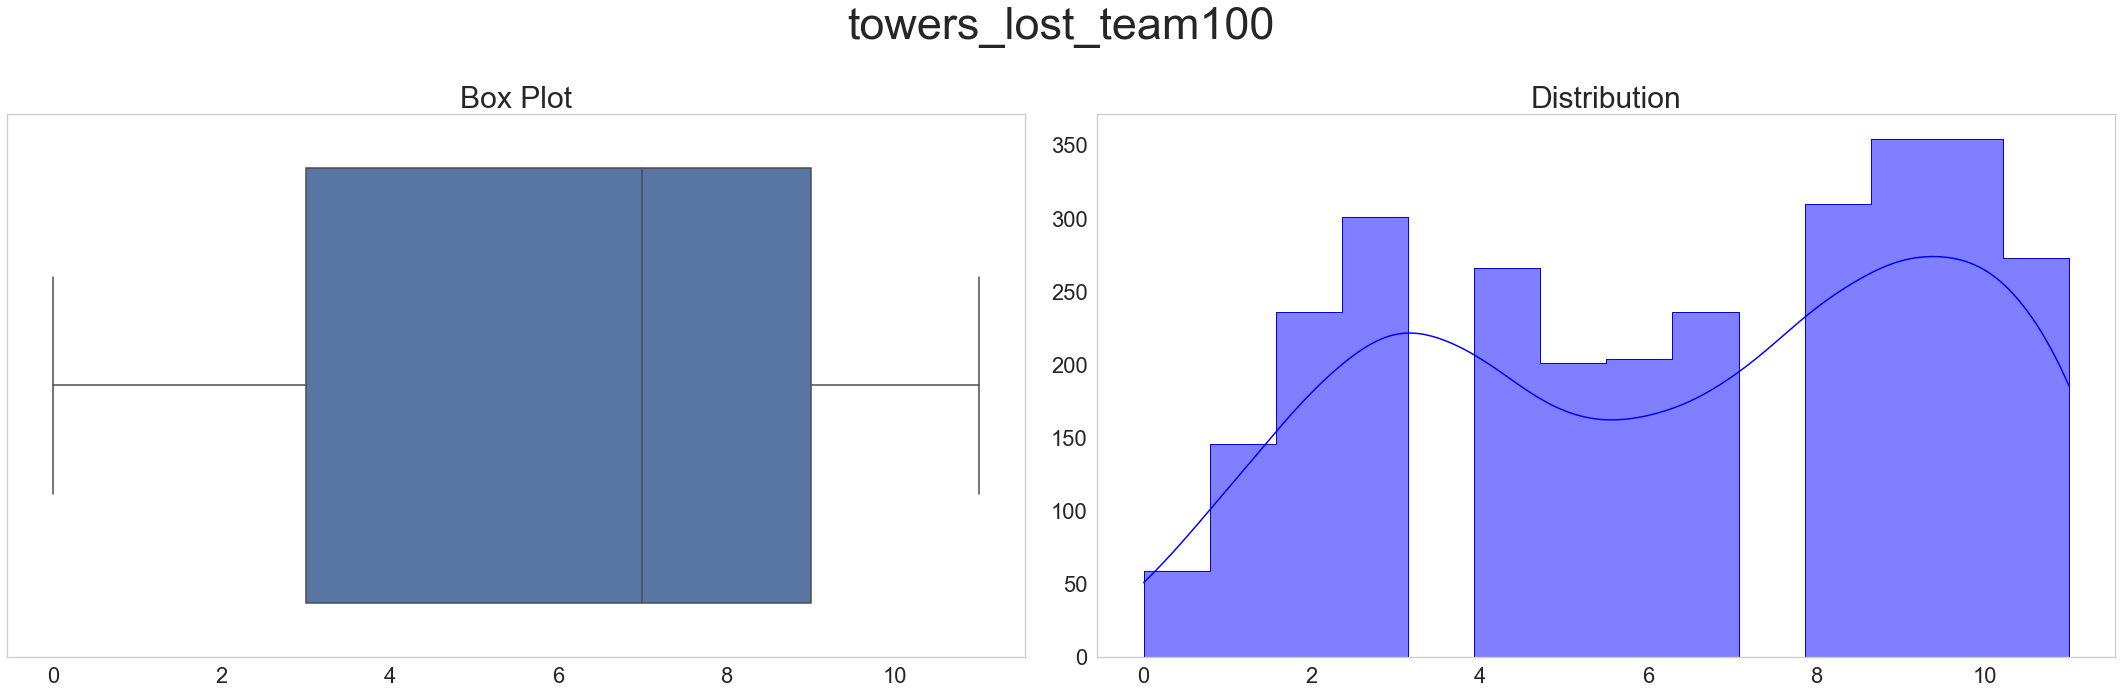

Summary Statistics for towers_lost_team100
count    2940.000000
mean        6.352041
std         3.211425
min         0.000000
25%         3.000000
50%         7.000000
75%         9.000000
max        11.000000
Name: towers_lost_team100, dtype: float64


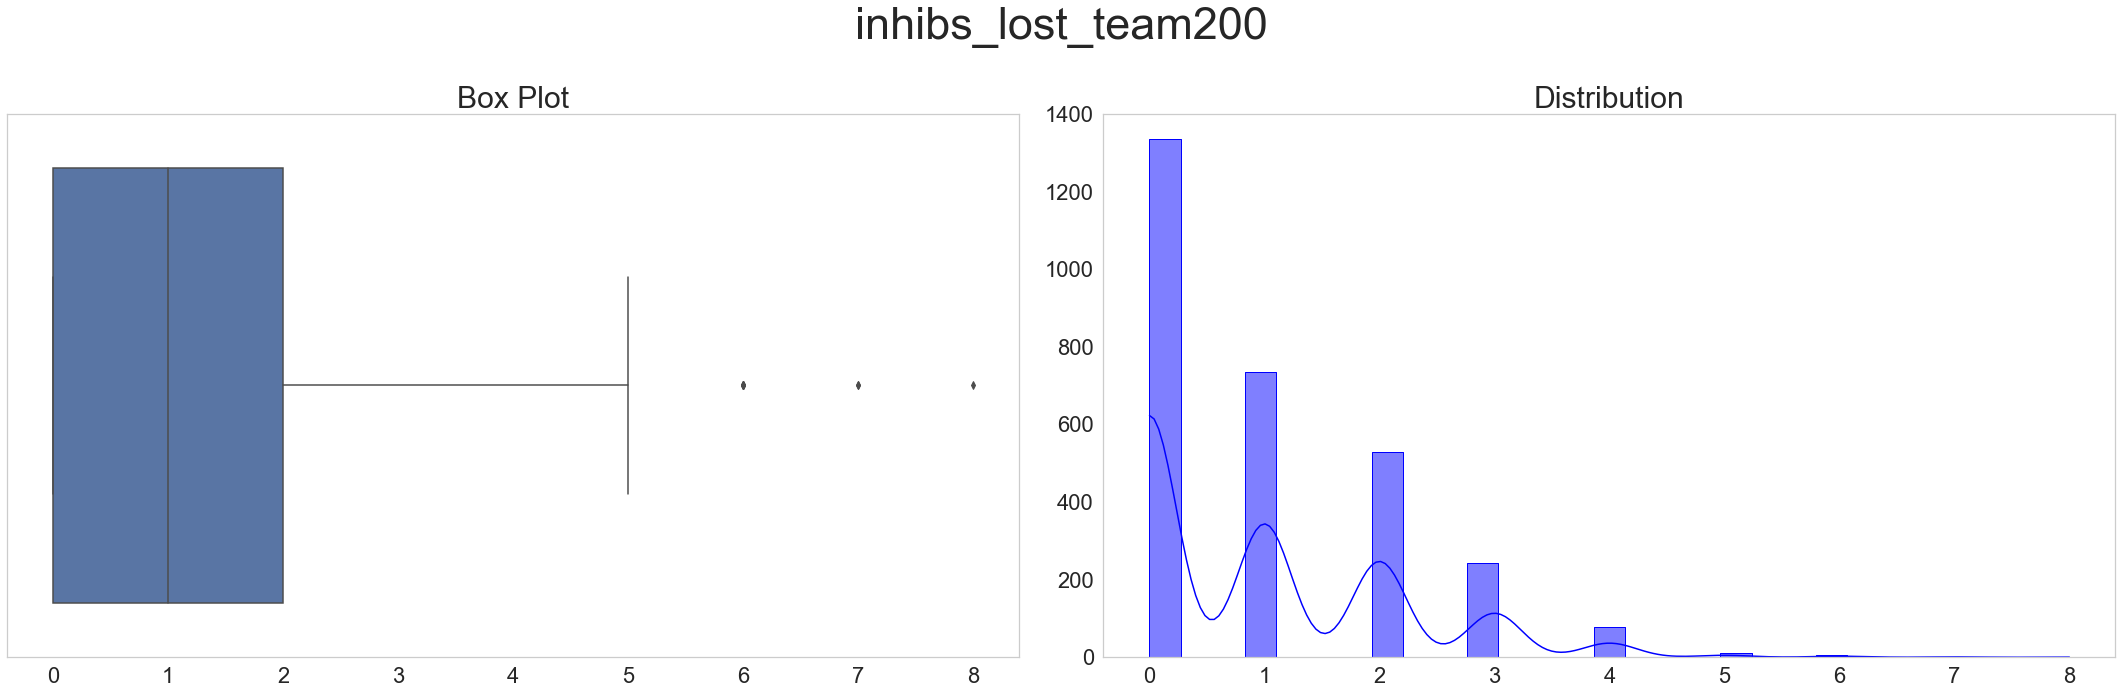

Summary Statistics for inhibs_lost_team200
count    2940.000000
mean        1.002721
std         1.164283
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: inhibs_lost_team200, dtype: float64


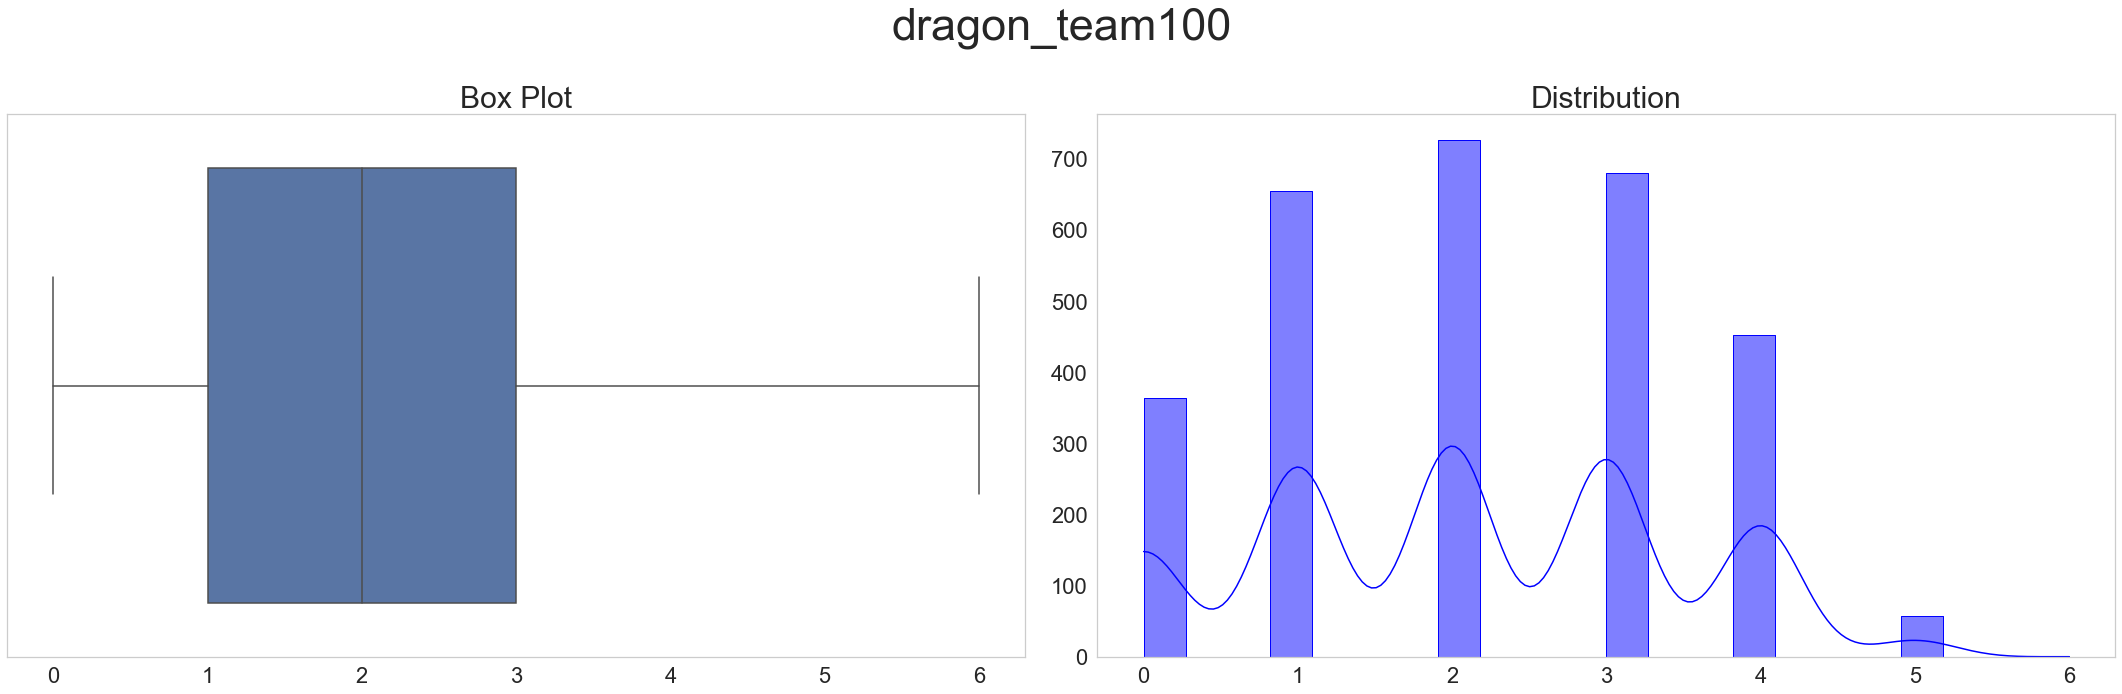

Summary Statistics for dragon_team100
count    2940.000000
mean        2.131293
std         1.318247
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: dragon_team100, dtype: float64


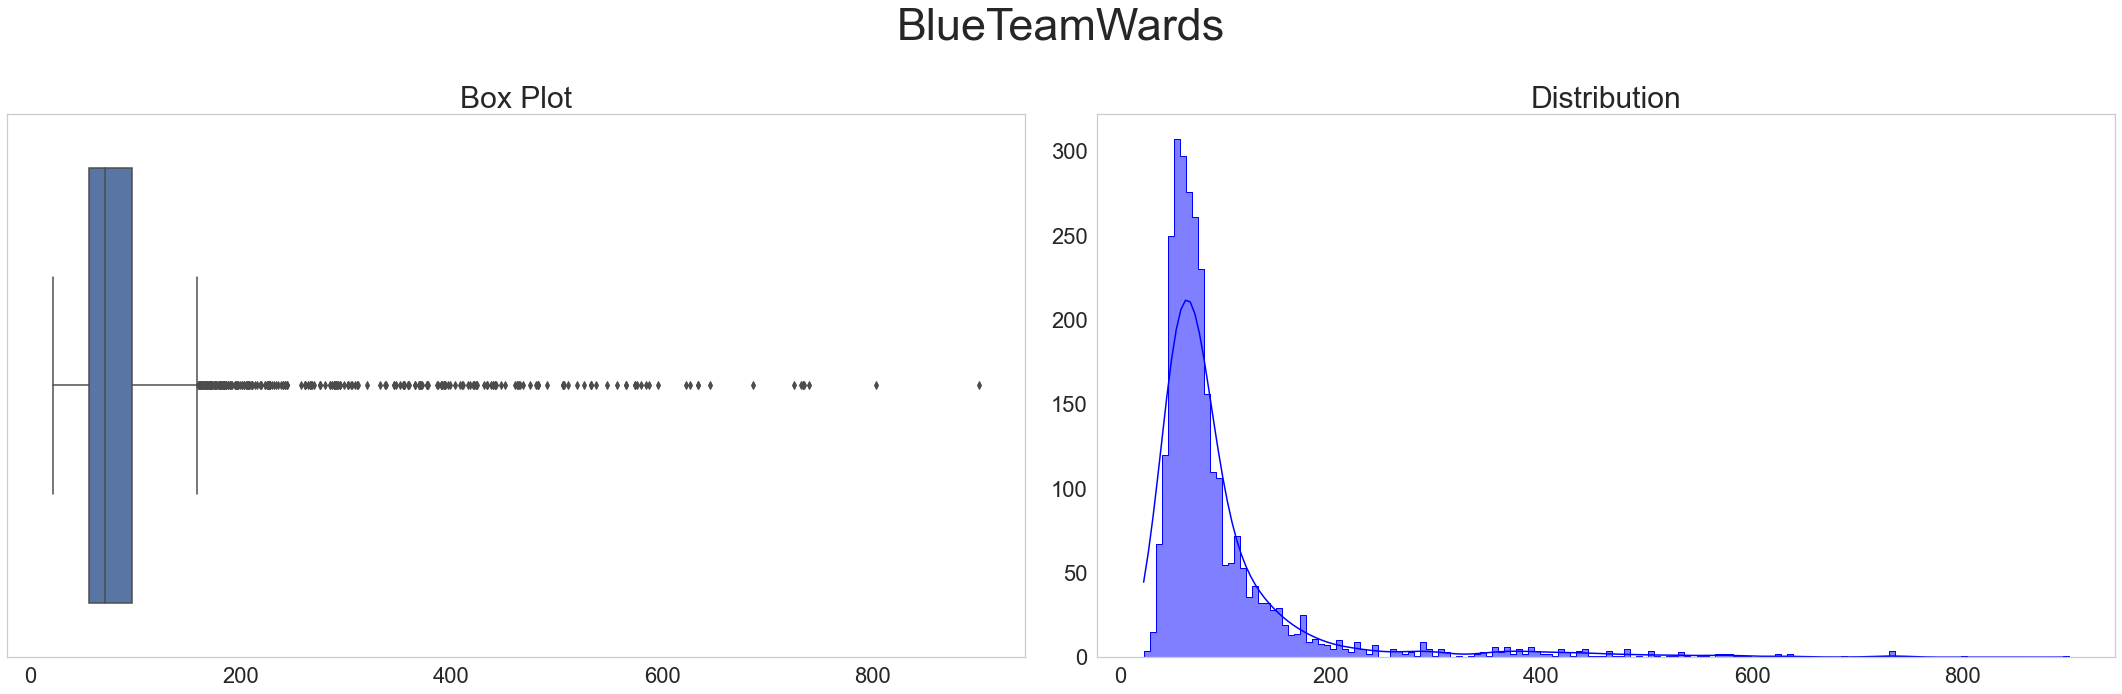

Summary Statistics for BlueTeamWards
count    2940.000000
mean       97.219048
std        89.315953
min        22.000000
25%        56.000000
50%        71.000000
75%        97.000000
max       901.000000
Name: BlueTeamWards, dtype: float64


In [106]:
# univariate study
univariate_study = ['BlueTeamAssists','BlueTeamMagicDamageDoneToChampions','winningTeam','BlueTeamXp','towers_lost_team100','inhibs_lost_team200','dragon_team100','BlueTeamWards']

for i in univariate_study:
    explore_univariate(train, i)
    print(f'Summary Statistics for {i}\n{train[i].describe()}')

<Figure size 864x576 with 0 Axes>

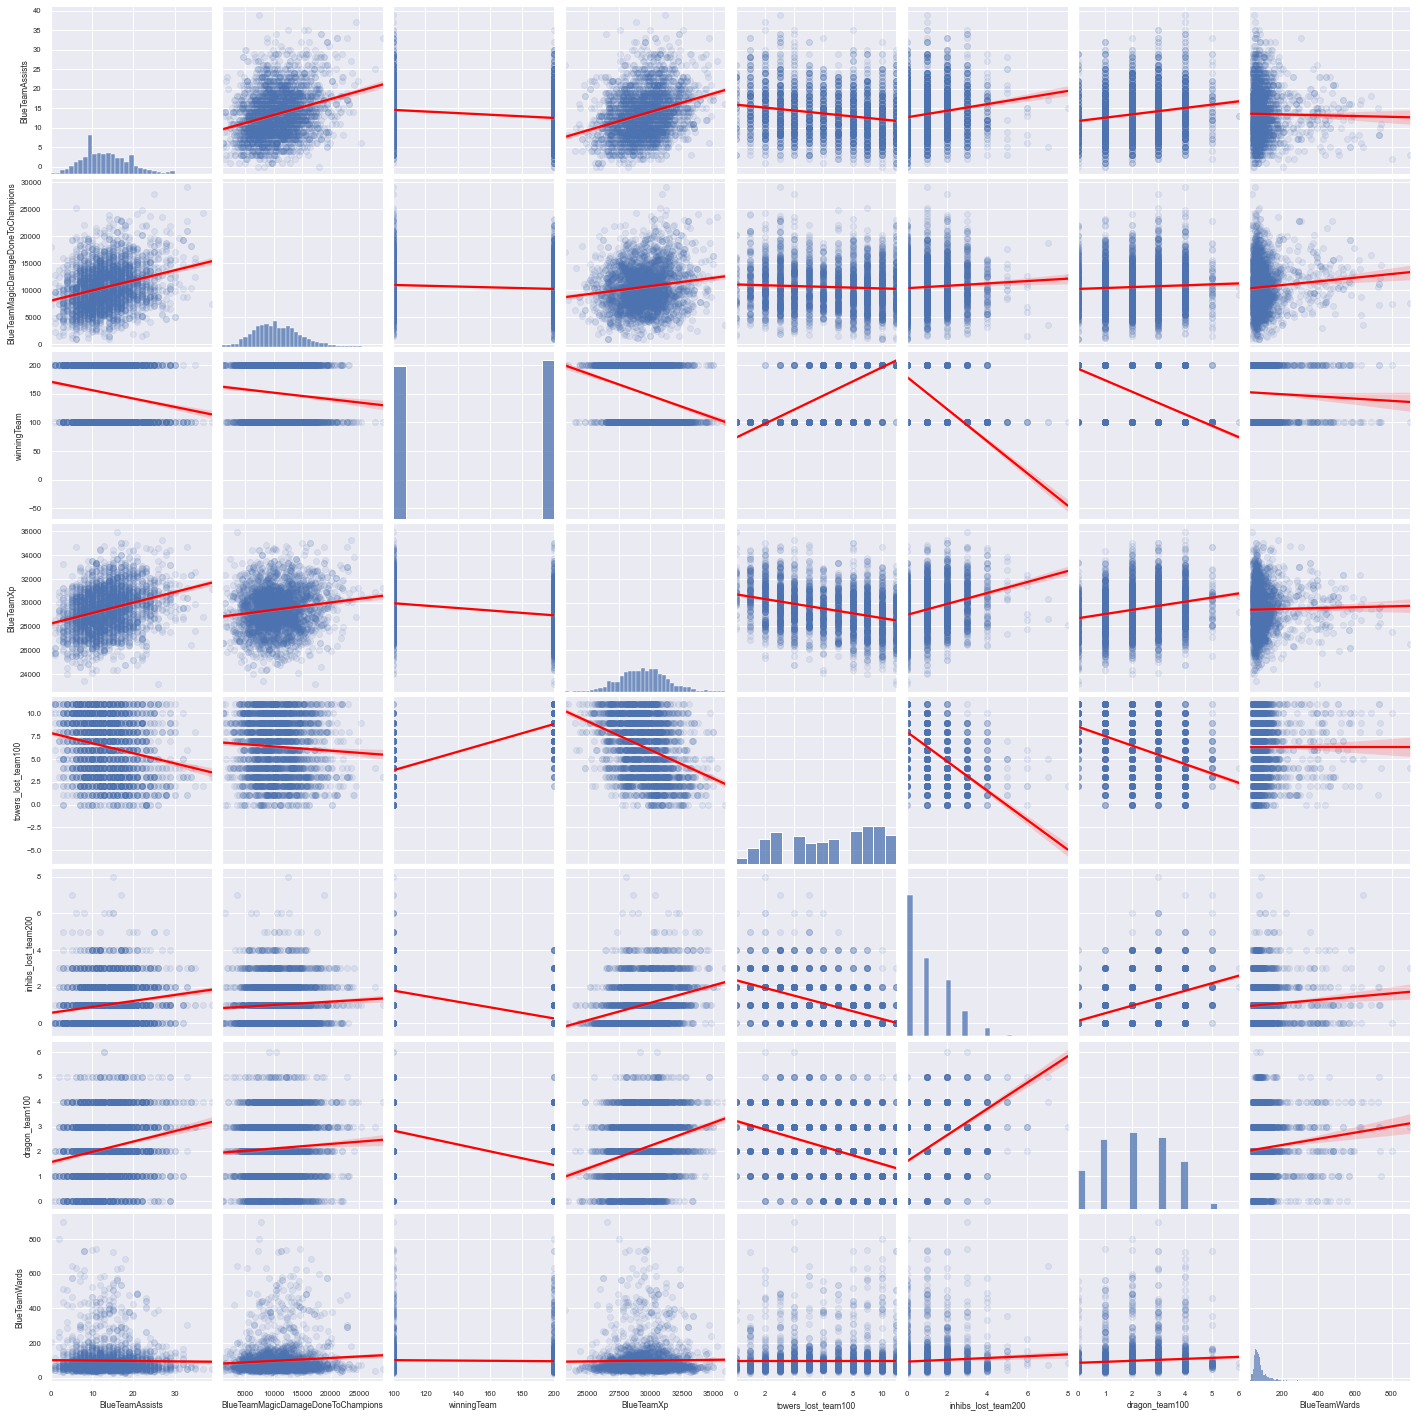

In [55]:
def plot_variable_pairs(train, cols, hue=None):
    '''
    This function takes in a df, a list of cols to plot, and default hue=None 
    and displays a pairplot with a red regression line.
    '''
    plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.4}}
    sns.pairplot(train[cols], hue=hue, kind="reg",plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
    sns.set(font_scale = .7)
    plt.show()
cols = ['BlueTeamAssists','BlueTeamMagicDamageDoneToChampions','winningTeam','BlueTeamXp','towers_lost_team100','inhibs_lost_team200','dragon_team100','BlueTeamWards']
#pairplots 
sns.set(font_scale=.7)
plt.figure(figsize=(12,8))
plot_variable_pairs(train, cols)

## Variabe Pairs Takeaway

- Blue team assists are normally distributed with average assists of 22
- Blue team xp increases with increase damage to opponents champion
- Blue team lost an average of 5 towers
- Blue team won on average 

In [113]:
## Heatmap 
#sns.set(font_scale=2)
#plt.figure(figsize=(22,70))
#heatmap = sns.heatmap(df.corr)([['winningTeam']].sort_values(by='winningTeam', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')

corr = train.corr() #
plt.figure(figsize=(22, 70))

heatmap = sns.heatmap(corr(['winningTeam'][(corr >= 0.5) | (corr <= -0.4)].sort_values(by='winningTeam', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm'))



TypeError: list indices must be integers or slices, not DataFrame

<Figure size 1584x5040 with 0 Axes>

### Takeaways

- Red Team Correlations: inhibs won: .79, dragons won: .63, baron team won: .54, red team kills: .54
- Blue Team correlations: towers won: .80, dragon team: .65, blue xp: .54, blue team level; .53

In [57]:
cols = ['BlueTeamAssists','BlueTeamMagicDamageDoneToChampions','winningTeam','BlueTeamXp','towers_lost_team100','inhibs_lost_team100','dragon_team100']

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The p-value is: 5.624781857167473e-219. There is 0.0% chance that we see these results by chance.
r = 0.54


<Figure size 864x720 with 0 Axes>

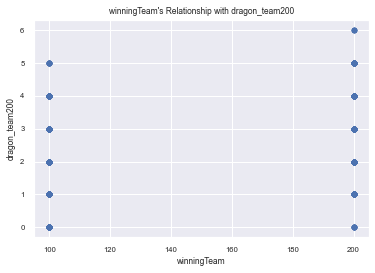

In [58]:
# correlation
sns.set(font_scale=.7)
plt.figure(figsize=(12,10))
correlation_exploration(train, 'winningTeam','dragon_team200')
# Looks like magice damage done by blue team to champions decreases after 2 inhibitor lost by red team

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The p-value is: 0.0. There is 0.0% chance that we see these results by chance.
r = 0.65


<Figure size 864x720 with 0 Axes>

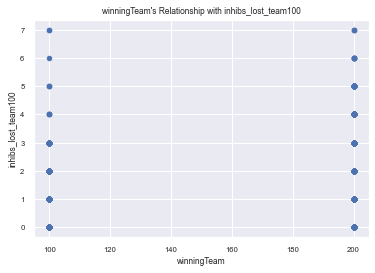

In [116]:
# correlation
sns.set(font_scale=.7)
plt.figure(figsize=(12,10))
correlation_exploration(train, 'winningTeam','inhibs_lost_team100')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The p-value is: 2.7457027471094557e-21. There is 0.0% chance that we see these results by chance.
r = -0.17


<Figure size 864x720 with 0 Axes>

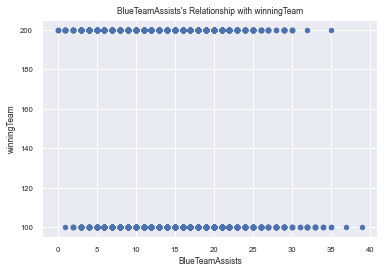

In [59]:
# correlation
sns.set(font_scale=.7)
plt.figure(figsize=(12,10))
correlation_exploration(train, 'BlueTeamAssists', 'winningTeam')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The p-value is: 0.06139067268146681. There is 0.061% chance that we see these results by chance.
r = -0.03


<Figure size 864x720 with 0 Axes>

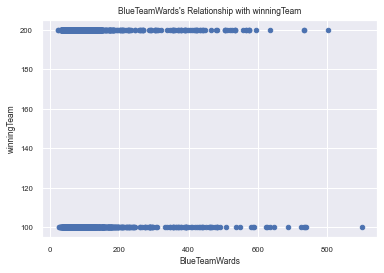

In [60]:
plt.figure(figsize=(12,10))
correlation_exploration(train, 'BlueTeamWards', 'winningTeam')
# high correlation between total gold for blue team and the outcome

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The p-value is: 0.0. There is 0.0% chance that we see these results by chance.
r = 0.79


<Figure size 864x720 with 0 Axes>

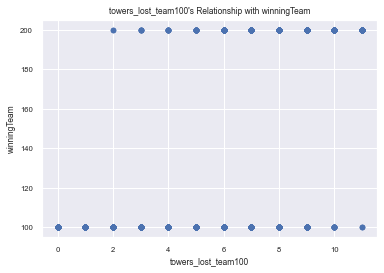

In [61]:
plt.figure(figsize=(12,10))
correlation_exploration(train, 'towers_lost_team100', 'winningTeam')
# no correlation

# Exploration

## What key drivers effect the outcome of winning a match?

### Question 1
- Is there a correlation between Blue team losing thier tower or red team losing thier tower and the outcome of the game

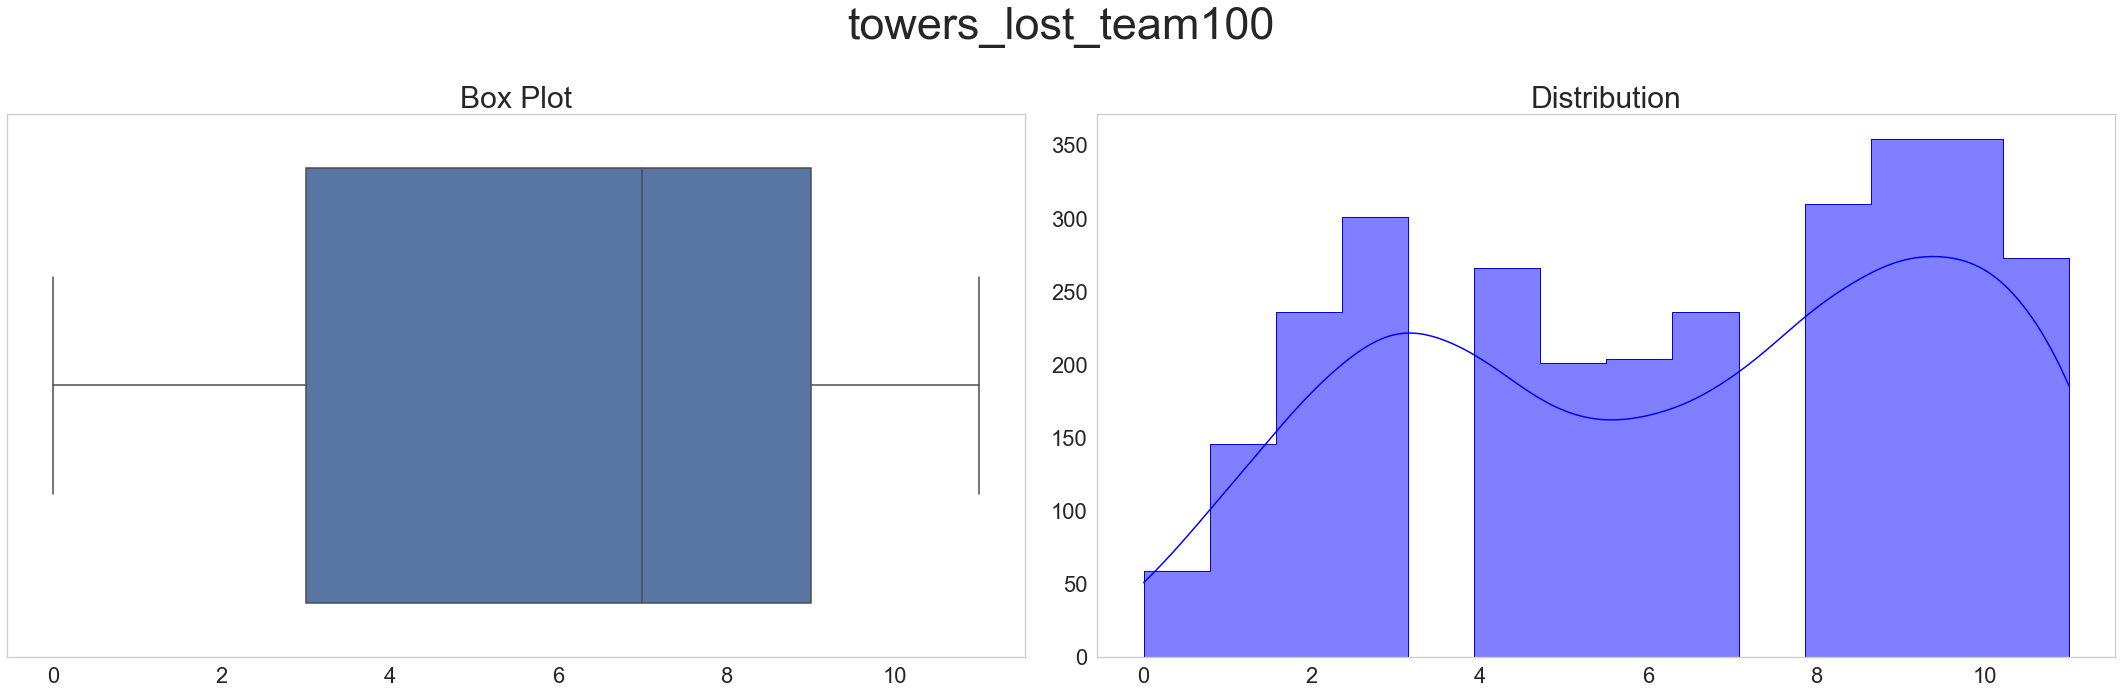

Summary Statistics for towers_lost_team100
count    2940.000000
mean        6.352041
std         3.211425
min         0.000000
25%         3.000000
50%         7.000000
75%         9.000000
max        11.000000
Name: towers_lost_team100, dtype: float64


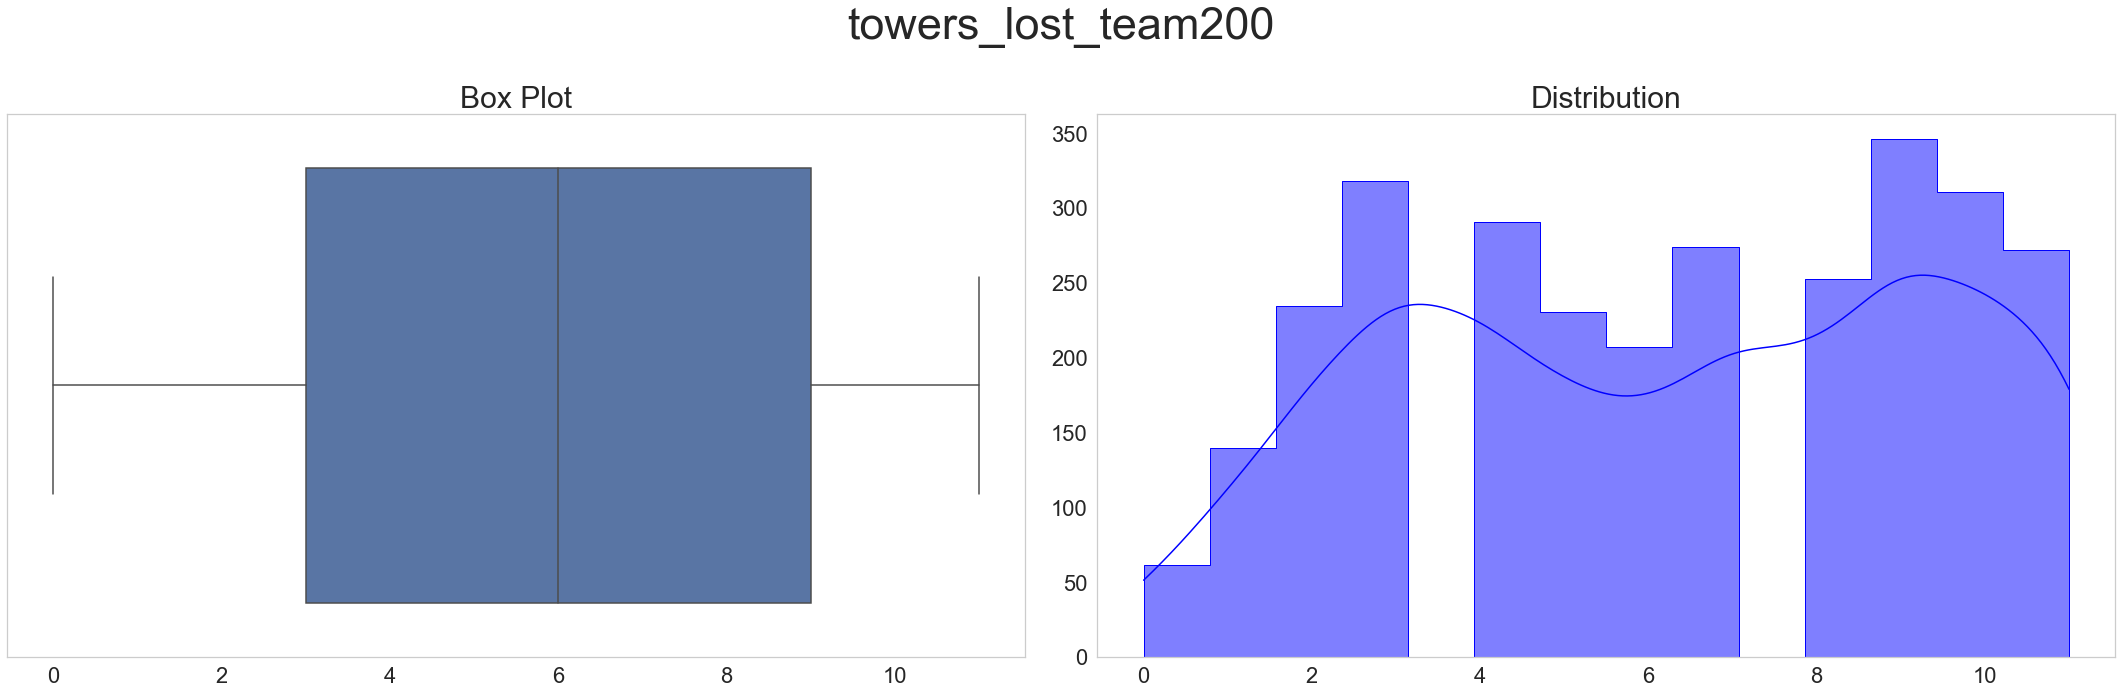

Summary Statistics for towers_lost_team200
count    2940.000000
mean        6.218707
std         3.183424
min         0.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        11.000000
Name: towers_lost_team200, dtype: float64


In [62]:
# univariate study
univariate_study = ['towers_lost_team100','towers_lost_team200']

for i in univariate_study:
    explore_univariate(train, i)
    print(f'Summary Statistics for {i}\n{train[i].describe()}')

- Blue team lost on average 6 towers and Red team lost on average 6 towers as well
- Both teams towers lost look to be evenly distributed

# Man Whitney U

In [63]:
# Stats
from scipy.stats import mannwhitneyu, wilcoxon
from scipy.stats import levene
# From the scypi stats library, im going to use the levene test to check variance.
# It will test the null hypothesis that all input samples are from populations with equal variances.
stats, p = levene(df.towers_lost_team100, df.towers_lost_team200)
print(stats, p)
alpha = .05
if p < alpha:
    print("blue and red populations do not have equal variances")
else:
    print("blue and red populations do have equal variances")


0.13988055180961076 0.7084073405845489
blue and red populations do have equal variances


## $H_0$: Red team that loses less then 5 towers will not give the blue team victory

## $H_a$: Red team that loses more then 5 towers will give the blue team the victory

In [67]:
import scipy.stats as stats
# hypothesis testing

null_hypothesis = "Red team towers lost < 6 has no difference in the outcome of the game"
alternative_hypothesis = "Red team towers lost > 6 has a difference in the outcome of the game"
a = 0.05 #a for alpha 

big_loss = train[train.towers_lost_team200 > 6]
little_loss = train[train.towers_lost_team200 <= 6]
t, p = stats.ttest_ind(big_loss.winningTeam, little_loss.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

0.0
Reject null hypothesis that: Red team towers lost < 6 has no difference in the outcome of the game
There is evidence to suggest: Red team towers lost > 6 has a difference in the outcome of the game


### Hypothesis Results:
- There is a difference when the red team loses 5 or more towers that will give the blue team the victory

### Takeaways
- I have a 95% confidence level that there is a difference in outcome when red team loses 5 or more towers
- Red and blue team towers lost averages are almost identical
- Red or blue towers lost could be useful in the modeling phase

### Question 2
- Is there a correlation between Blue team xp, red team xp and the outcome of the game

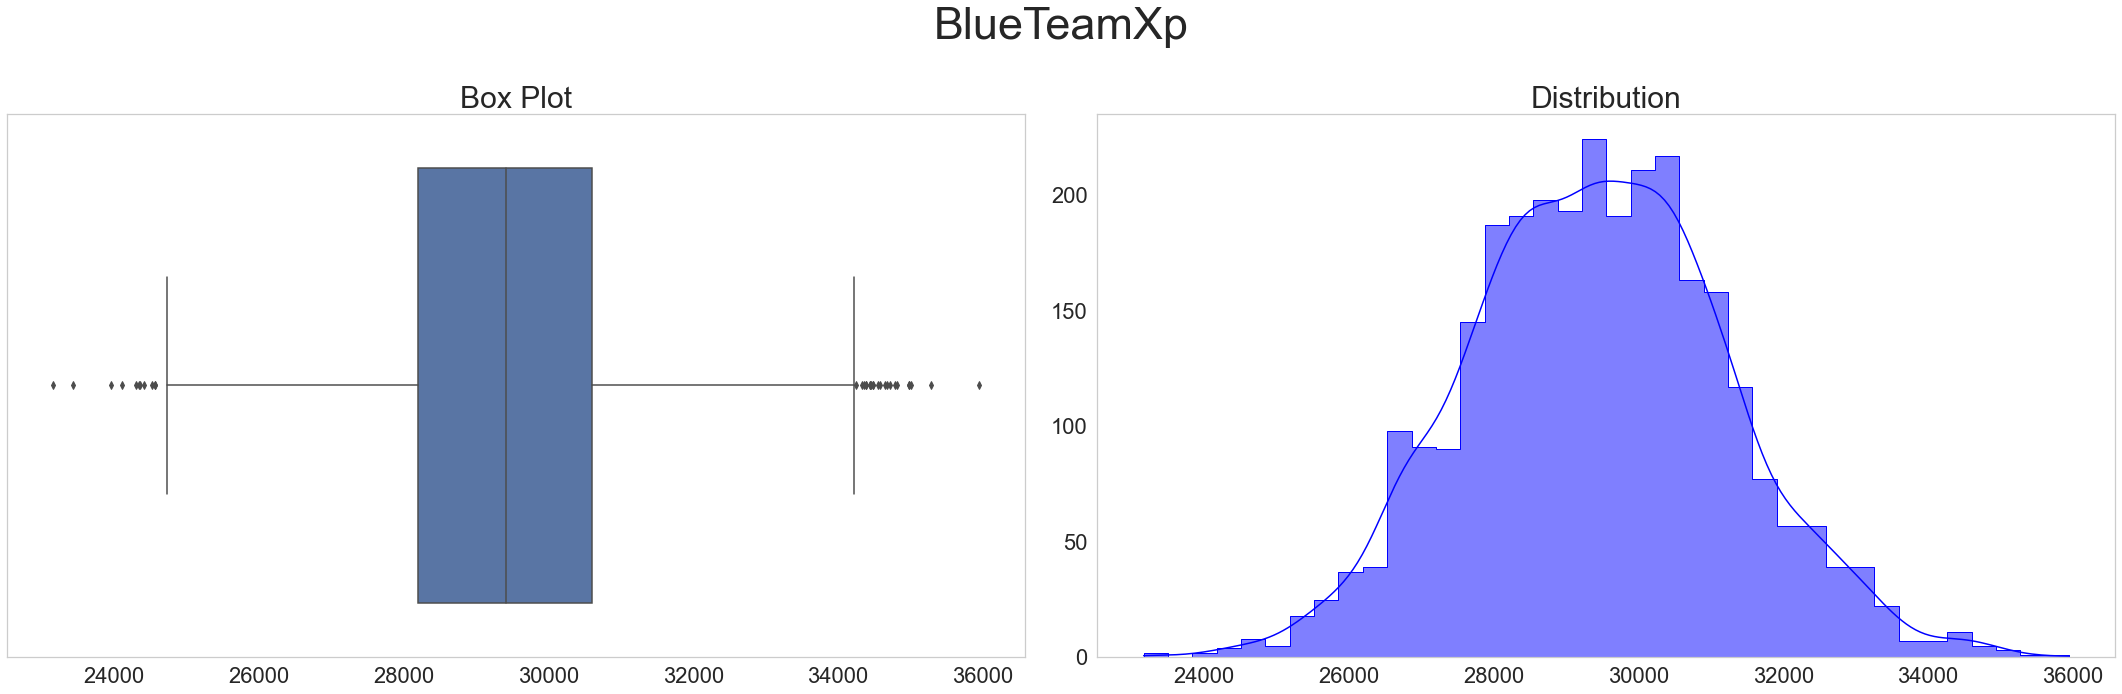

Summary Statistics for BlueTeamXp
count     2940.000000
mean     29433.540476
std       1811.992956
min      23162.000000
25%      28192.000000
50%      29417.000000
75%      30605.000000
max      35947.000000
Name: BlueTeamXp, dtype: float64


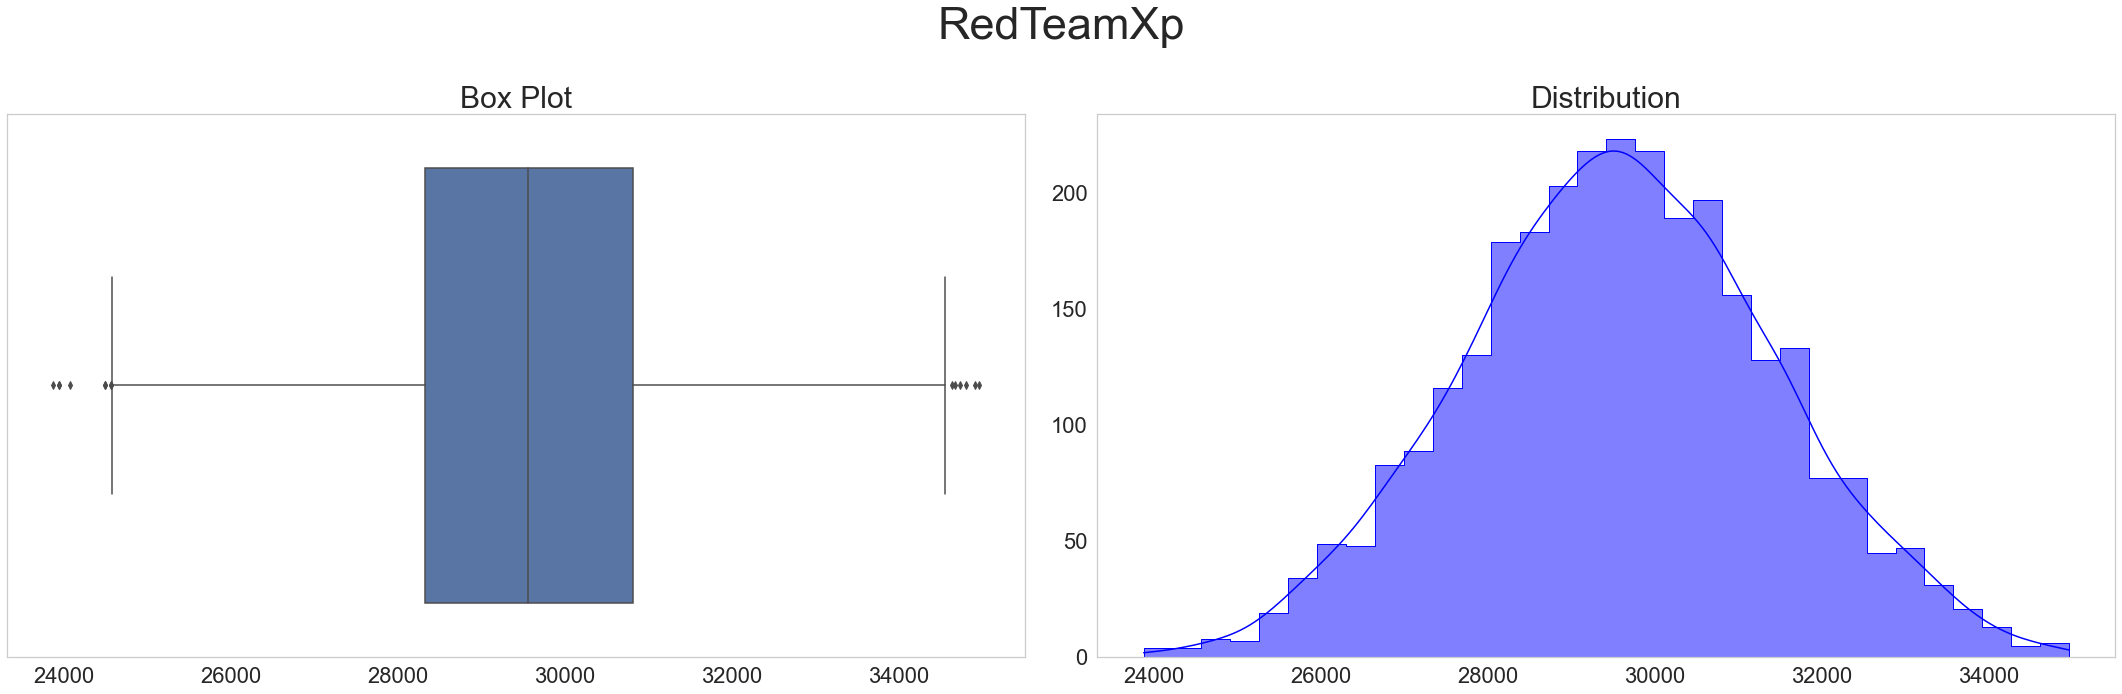

Summary Statistics for RedTeamXp
count     2940.000000
mean     29566.937755
std       1856.880687
min      23871.000000
25%      28321.000000
50%      29555.000000
75%      30818.250000
max      34966.000000
Name: RedTeamXp, dtype: float64


In [68]:
# univariate study
univariate_study = ['BlueTeamXp','RedTeamXp']

for i in univariate_study:
    explore_univariate(train, i)
    print(f'Summary Statistics for {i}\n{train[i].describe()}')

- Blue team averaged 41,253 xp and Red team averaged 41,593 xp
- Both teams xp's are normally distributed

# Man Whitney U

In [69]:
# From the scypi stats library, im going to use the levene test to check variance.
# It will test the null hypothesis that all input samples are from populations with equal variances.
stats, p = levene(df.BlueTeamXp, df.RedTeamXp)
print(stats, p)
alpha = .05
if p < alpha:
    print("blue and red populations do not have equal variances")
else:
    print("blue and red populations do have equal variances")


4.231350233456209 0.039708504797137584
blue and red populations do not have equal variances


In [71]:
# hypothesis testing
import scipy.stats as stats
null_hypothesis = "Red team xp that is > 29,000 will not lead to a blue team win"
alternative_hypothesis = "Red team xp that is < 29,000 will lead to a blue team win"
a = 0.05 #a for alpha 

big_xp = train[train.RedTeamXp > 29_000]
little_xp = train[train.RedTeamXp <= 29_000]
t, p = stats.ttest_ind(big_xp.winningTeam, little_xp.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

2.4085125864947884e-29
Reject null hypothesis that: Red team xp that is > 29,000 will not lead to a blue team win
There is evidence to suggest: Red team xp that is < 29,000 will lead to a blue team win


### Hypothesis Results:
- There is a difference when the red team has more then 41k xp vs less then 41k xp that could lead to a blue team win

### Takeaways
- I have a 95% confidence level that there is a difference in outcome when red team has more then 41k xp
- Red and blue team xp means are almost the same
- Red or blue xp could be useful in the modeling phase

# Bivariate 

## Physical Damage

Damage by blue and outcome


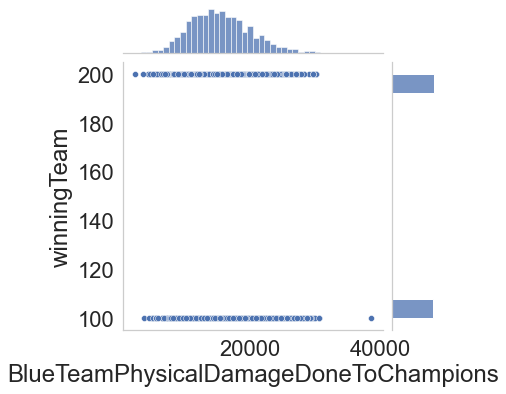

In [72]:
#winningTeam across physical damage to champions for blue team
print('Damage by blue and outcome')
sns.jointplot(x='BlueTeamPhysicalDamageDoneToChampions', y='winningTeam', data=train)
plt.xlabel('Damage')
plt.ylabel('Winning Team')
plt.show()


### Ho: Blue team total physical damage over 20k will not be significant for the outcome of the game

### Ha: Blue team total physical damage less then or equal 20k will be significant for the outcome of the game

In [73]:
# hypothesis testing

null_hypothesis = "BlueTeamPhysicalDamageDoneToChampions > 20,000 has no difference in the outcome of the game"
alternative_hypothesis = "BlueTeamPhysicalDamageDoneToChampions < 20,000 has a difference in the outcome of the game"
a = 0.05 #a for alpha 

big_damage = train[train.BlueTeamPhysicalDamageDoneToChampions > 20_000]
little_damage = train[train.BlueTeamPhysicalDamageDoneToChampions <= 20_000]
t, p = stats.ttest_ind(big_damage.winningTeam, little_damage.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

0.01076074803946675
Reject null hypothesis that: BlueTeamPhysicalDamageDoneToChampions > 20,000 has no difference in the outcome of the game
There is evidence to suggest: BlueTeamPhysicalDamageDoneToChampions < 20,000 has a difference in the outcome of the game


- Team damage over 20k does not effect the outcome of the game

## Team Level 

Team level blue and outcome


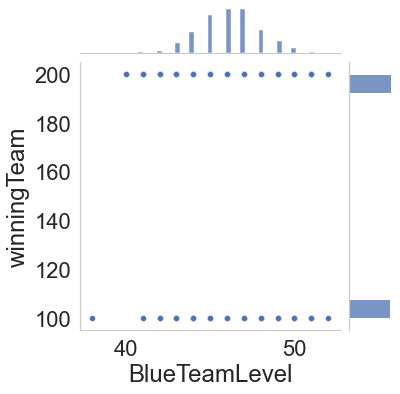

In [74]:
#winningTeam across team level for blue team
print('Team level blue and outcome')
sns.jointplot(x='BlueTeamLevel', y='winningTeam', data=train)
plt.xlabel('Team Level')
plt.ylabel('Winning Team')
plt.show()


### Ho: Average Blue team level of less then 55  will not be significant for the outcome of the game

### Ha: Average Blue team level of 55 and over will be significant for the outcome of the game

In [76]:
# hypothesis testing
import scipy.stats as stats
null_hypothesis = "BlueTeamLevel < 55 has no difference in the outcome of the game"
alternative_hypothesis = "BlueTeamLevel > 55 has a difference in the outcome of the game"
a = 0.05 #a for alpha 

big_level = train[train.BlueTeamLevel > 55]
little_level = train[train.BlueTeamLevel <= 55]
t, p = stats.ttest_ind(big_level.winningTeam, little_level.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

nan
Fail to reject null hypothesis that: BlueTeamLevel < 55 has no difference in the outcome of the game There is not sufficient evidence to reject it.


- A team who has an average level of 55 and over has significant effect on the game

## Wards

Team ward blue and outcome


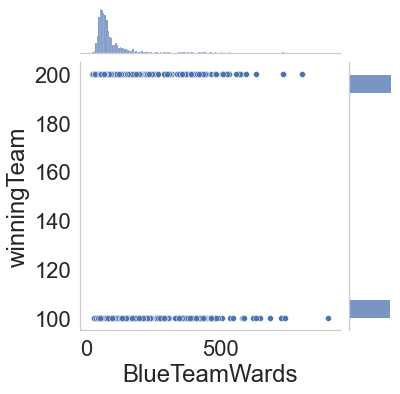

In [77]:
#winningTeam across team ward for blue team
print('Team ward blue and outcome')
sns.jointplot(x='BlueTeamWards', y='winningTeam', data=train)
plt.xlabel('Team Ward')
plt.ylabel('Winning Team')
plt.show()


## Ho: Blue team wards less then 88 will not make a difference in the outcome of the game

## Ha: Blue team wards greater then 88 will make a difference in the outcome of the game

In [78]:
# hypothesis testing

null_hypothesis = "BlueTeamWards < 88 has no difference in the outcome of the game"
alternative_hypothesis = "BlueTeamWards > 88 has a difference in the outcome of the game"
a = 0.05 #a for alpha 

big_ward = train[train.BlueTeamWards > 88]
little_ward = train[train.BlueTeamAssists > 22]
t, p = stats.ttest_ind(big_ward.winningTeam, little_ward.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

0.0010327950715414086
Reject null hypothesis that: BlueTeamWards < 88 has no difference in the outcome of the game
There is evidence to suggest: BlueTeamWards > 88 has a difference in the outcome of the game


## Team Assists

Team assists blue and outcome


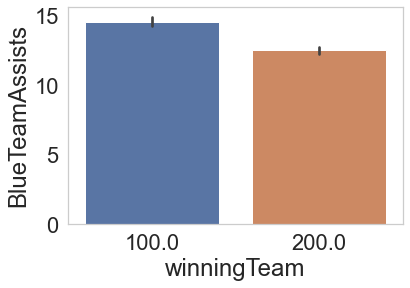

In [79]:
#winningTeam across team assists for blue team
print('Team assists blue and outcome')
sns.barplot(x='winningTeam', y='BlueTeamAssists', data=train)
plt.xlabel('winningTeam')
plt.ylabel('BlueTeamAssists')
plt.show()

## Ho: Blue team with assists under 22 will not have a difference in the outcome of the game

## Ha: Blue team with assists over 22 will have a difference in the outcome of the game

In [80]:
# hypothesis testing

null_hypothesis = "BlueTeamAssists < 22 has no difference in the outcome of the game"
alternative_hypothesis = "BlueTeamAssists > 22 has a difference in the outcome of the game"
a = 0.05 #a for alpha 

big_assists = train[train.BlueTeamAssists > 22]
little_assists = train[train.BlueTeamAssists <= 22]
t, p = stats.ttest_ind(big_assists.winningTeam, little_assists.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

3.7749382147015794e-07
Reject null hypothesis that: BlueTeamAssists < 22 has no difference in the outcome of the game
There is evidence to suggest: BlueTeamAssists > 22 has a difference in the outcome of the game


## Towers 

Team towers taken and outcome


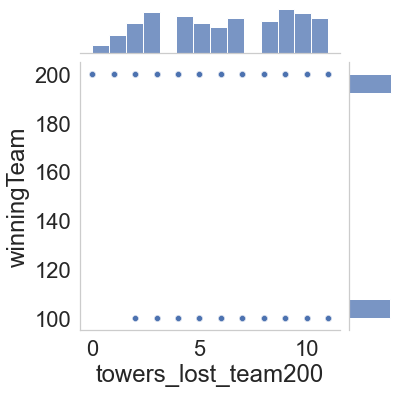

In [81]:
#winningTeam across towers taken for blue team
print('Team towers taken and outcome')
sns.jointplot(x='towers_lost_team200', y='winningTeam', data=train)
plt.xlabel('Towers taken by Blue')
plt.ylabel('Winning Team')
plt.show()

## Ho: Red team that loses less then 5 towers will not have a difference in the outcome of the game

## Ha: Red team that loses more then 5 towers will have a difference in the outcome of the game

In [82]:
# hypothesis testing

null_hypothesis = "Red team towers lost < 5 has no difference in the outcome of the game"
alternative_hypothesis = "Red team towers lost > 5 has a difference in the outcome of the game"
a = 0.05 #a for alpha 

big_loss = train[train.towers_lost_team200 > 5]
little_loss = train[train.towers_lost_team200 <= 5]
t, p = stats.ttest_ind(big_loss.winningTeam, little_loss.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

0.0
Reject null hypothesis that: Red team towers lost < 5 has no difference in the outcome of the game
There is evidence to suggest: Red team towers lost > 5 has a difference in the outcome of the game


Team dragons taken and outcome


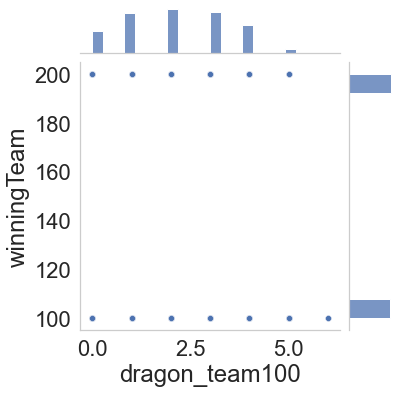

In [83]:
#winningTeam and dragon taken for blue team
print('Team dragons taken and outcome')
sns.jointplot(x='dragon_team100', y='winningTeam', data=train)
plt.xlabel('Towers taken by Blue')
plt.ylabel('Winning Team')
plt.show()

In [84]:
# hypothesis testing

null_hypothesis = "Blue team takes < 2 dragons has no difference in the outcome of the game"
alternative_hypothesis = "Blue team takes > 2 dragons has a difference in the outcome of the game"
a = 0.05 #a for alpha 

big_gain = train[train.dragon_team100 > 2]
little_gain = train[train.dragon_team100 <= 2]
t, p = stats.ttest_ind(big_gain.winningTeam, little_gain.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

1.8687102715567335e-132
Reject null hypothesis that: Blue team takes < 2 dragons has no difference in the outcome of the game
There is evidence to suggest: Blue team takes > 2 dragons has a difference in the outcome of the game


## Multivariate 

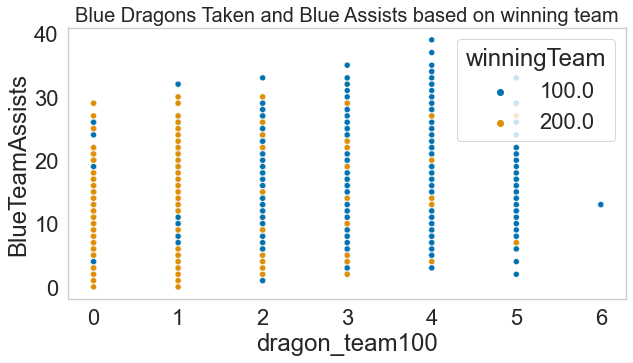

In [85]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='dragon_team100',y='BlueTeamAssists',data=train,hue='winningTeam', palette='colorblind')
plt.title('Blue Dragons Taken and Blue Assists based on winning team', fontsize = 20)
plt.show()

In [86]:
big_assists = train[train.dragon_team100 > 0]
little_assists = train[train.BlueTeamAssists > 0]
t, p = stats.ttest_ind(big_assists.winningTeam, little_assists.winningTeam)
print(p)

9.202297455937077e-06


- Blue team more then likely to win if the assist were above 30 and 2 or more dragons killed

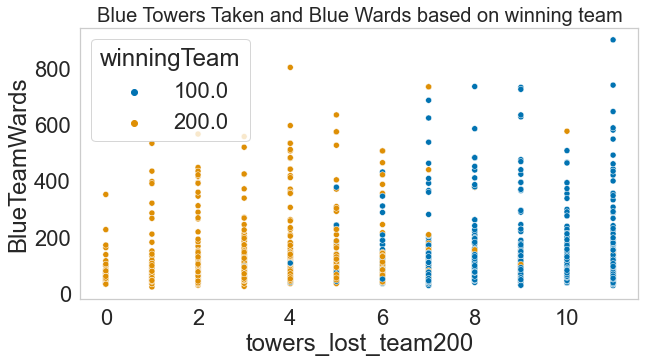

In [87]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='towers_lost_team200',y='BlueTeamWards',data=train,hue='winningTeam', palette='colorblind')
plt.title('Blue Towers Taken and Blue Wards based on winning team', fontsize = 20)
plt.show()

In [88]:
big_assists = train[train.towers_lost_team200 > 0]
little_assists = train[train.BlueTeamWards > 0]
t, p = stats.ttest_ind(big_assists.winningTeam, little_assists.winningTeam)
print(p)

0.42100928955680994


- Wards may have a minor role, however the number of towers blue team won atleast 4 or more is a key factor in the outcome

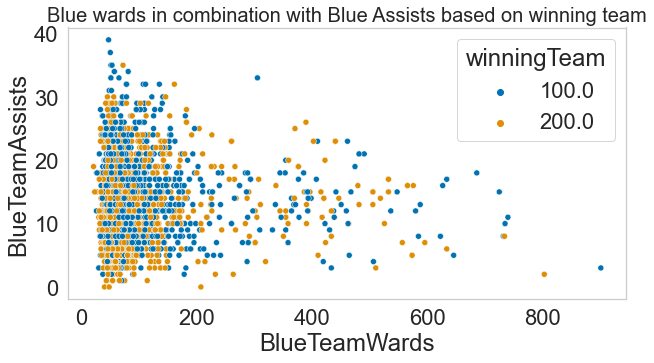

In [89]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='BlueTeamWards',y='BlueTeamAssists',data=train,hue='winningTeam', palette='colorblind')
plt.title('Blue wards in combination with Blue Assists based on winning team', fontsize = 20)
plt.show()

In [90]:
big_assists = train[train.BlueTeamWards > 1]
little_assists = train[train.BlueTeamAssists > 22]
t, p = stats.ttest_ind(big_assists.winningTeam, little_assists.winningTeam)
print(p)

2.6581394498612435e-06


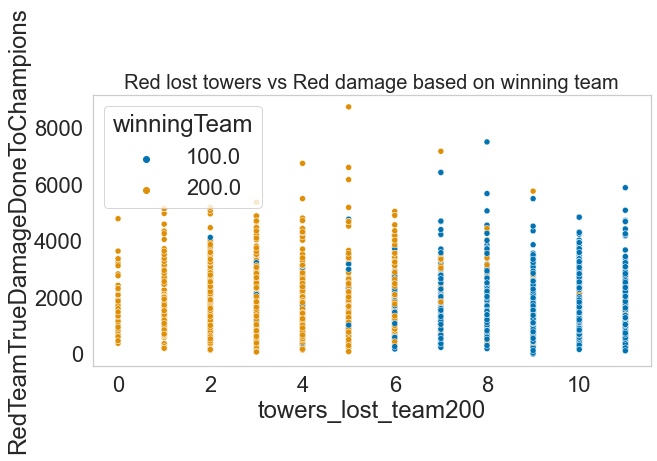

In [91]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='towers_lost_team200',y='RedTeamTrueDamageDoneToChampions',data=train,hue='winningTeam', palette='colorblind')
plt.title('Red lost towers vs Red damage based on winning team', fontsize = 20)
plt.show()

In [92]:
big_assists = train[train.towers_lost_team200 > 0]
little_assists = train[train.RedTeamTrueDamageDoneToChampions > 0]
t, p = stats.ttest_ind(big_assists.winningTeam, little_assists.winningTeam)
print(p)

0.4134465312470086


- losing towers to blue team is more important then total damage by red team

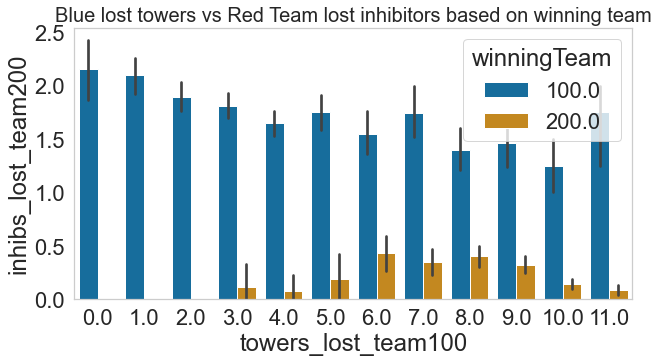

In [93]:
plt.figure(figsize=(10,5))
sns.barplot(x='towers_lost_team100',y='inhibs_lost_team200',data=train,hue='winningTeam', palette='colorblind')
plt.title('Blue lost towers vs Red Team lost inhibitors based on winning team', fontsize = 20)
plt.show()

In [94]:
big_assists = train[train.towers_lost_team100 > 0]
little_assists = train[train.inhibs_lost_team200 > 0]
t, p = stats.ttest_ind(big_assists.winningTeam, little_assists.winningTeam)
print(p)

2.5276380221949103e-135


- even if blue team lost towers, if red team lost 1 inhibitor the outcome is blue team winning